In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('pokemon.csv')

In [3]:
df.iloc[773]['capture_rate']

'30 (Meteorite)255 (Core)'

In [4]:
df = df.drop(773)

In [5]:
df['base_happiness'].dtype

dtype('int64')

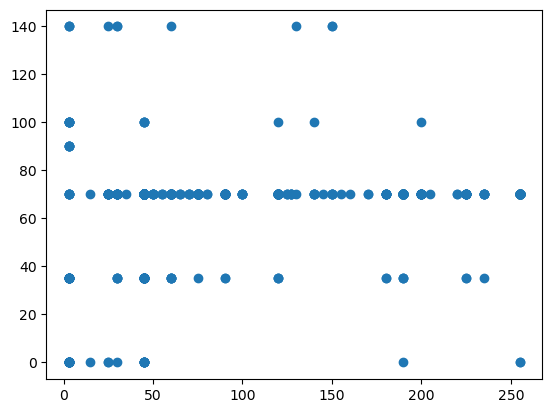

In [6]:
df['capture_rate'] = df['capture_rate'].astype(int)
plt.scatter(df['capture_rate'], df['base_happiness'])

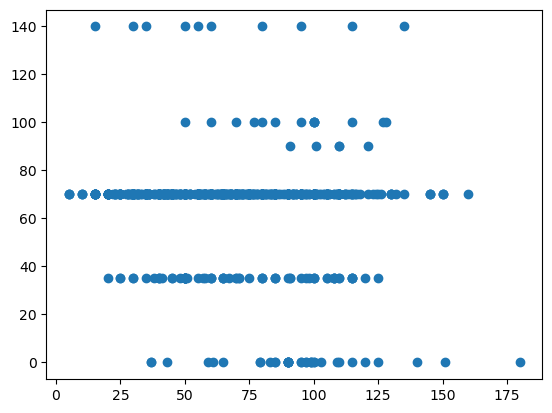

In [7]:
plt.scatter(df['speed'], df['base_happiness'])

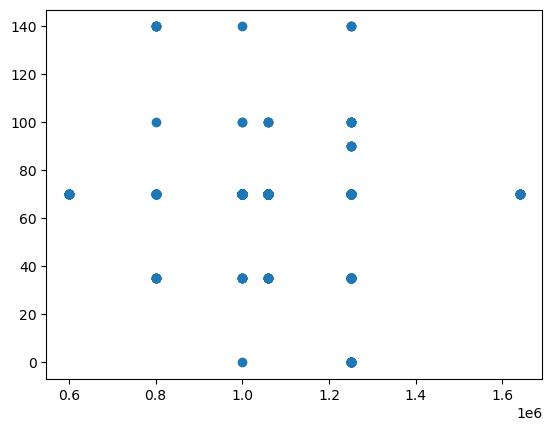

In [8]:
plt.scatter(df['experience_growth'], df['base_happiness'])

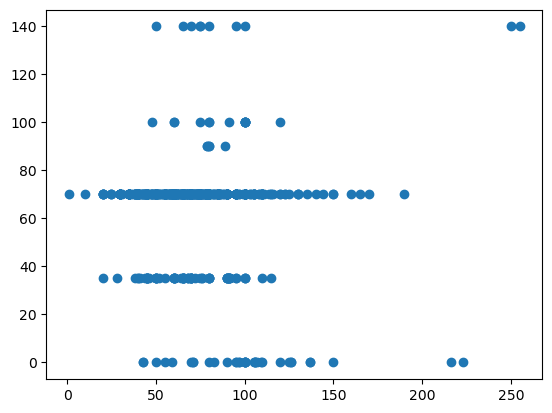

In [9]:
plt.scatter(df['hp'], df['base_happiness'])

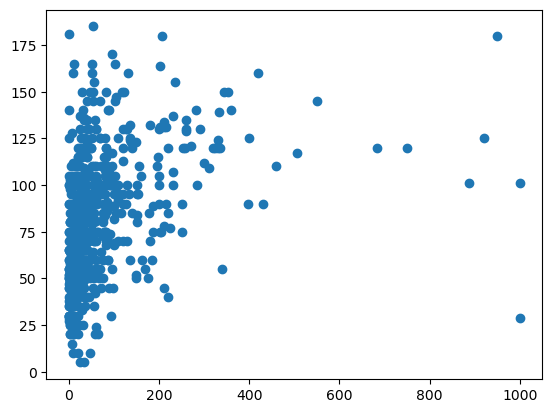

In [10]:
plt.scatter(df['weight_kg'], df['attack'])

In [47]:
df['weight_kg'] = df['weight_kg'].fillna(0)
query = df

_25 = query['weight_kg'].quantile(0.25)
_75 = query['weight_kg'].quantile(0.75)
iqr = _75-_25
upper_bound = _75 + 1.5*iqr
upper_bound

141.65

Text(0, 125, 'R: 0.45')

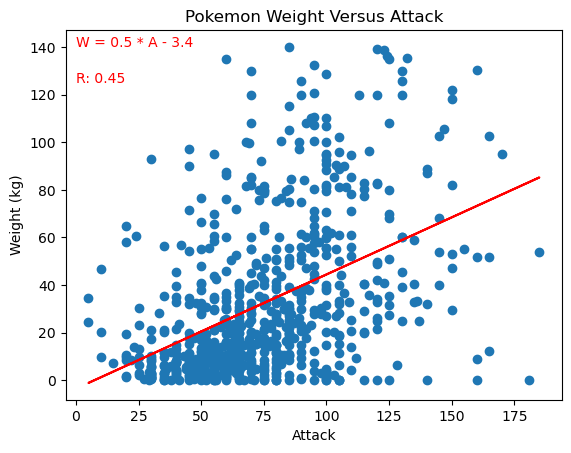

In [48]:
import scipy.stats as sts
query = query.query("weight_kg < @upper_bound")
plt.scatter(query['attack'], query['weight_kg'])
slope, intercept, rvalue, pvalue, stderr = sts.linregress(query['attack'], query['weight_kg'])
regress_values = query['attack'] * slope + intercept
plt.plot(query['attack'], regress_values, color='red')
sts.linregress(query['attack'], query['weight_kg'])
plt.xlabel("Attack")
plt.ylabel("Weight (kg)")
plt.title('Pokemon Weight Versus Attack')
plt.annotate(f'W = {round(slope,1)} * A - {round(abs(intercept),1)}', (0, 140), fontsize=10, color="red")
plt.annotate(f'R: {round(rvalue, 2)}', (0, 125), fontsize=10, color="red")


(array([42., 31., 34., 31., 25., 31., 24., 21., 16., 14., 22., 11., 13.,
        22., 14., 11., 16.,  8., 13., 12., 16., 14., 12., 10.,  6.,  8.,
        12., 11.,  4.,  4.,  4.,  6.,  5.,  4.,  7.,  7.,  4., 13.,  3.,
         4., 10.,  7.,  2.,  3.,  2.,  2.,  1.,  4.,  3.,  0.,  3.,  4.,
         2.,  4.,  9.,  7.,  2.,  5.,  2.,  4.,  2.,  2.,  3.,  2.,  4.,
         3.,  0.,  6.,  1.,  2.,  1.,  1.,  5.,  0.,  3.,  0.,  0.,  1.,
         0.,  1.,  0.,  6.,  1.,  0.,  2.,  0.,  1.,  2.,  1.,  1.,  0.,
         4.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000e-01, 1.57900e+00, 3.05800e+00, 4.53700e+00, 6.01600e+00,
        7.49500e+00, 8.97400e+00, 1.04530e+01, 1.19320e+01, 1.34110e+01,
        1.48900e+01, 1.63690e+01, 1.78480e+01, 1.93270e+01, 2.08060e+01,
        2.22850e+01, 2.37640e+01, 2.52430e+01, 2.67220e+01, 2.82010e+01,
        2.96800e+01, 3.11590e+01, 3.26380e+01, 3.41170e+01, 3.55960e+01,
        3.70750e+01, 3.85540e+01, 4.00330e+01, 4.15120e+01, 4.29910e+

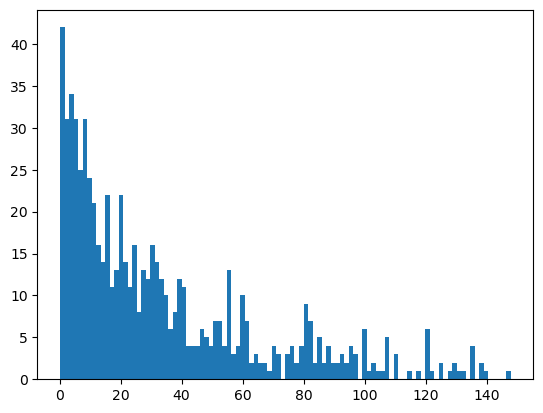

In [35]:
plt.hist(query['weight_kg'], bins=100)

Text(0.5, 1.0, 'Distribution of Pokemon Weights')

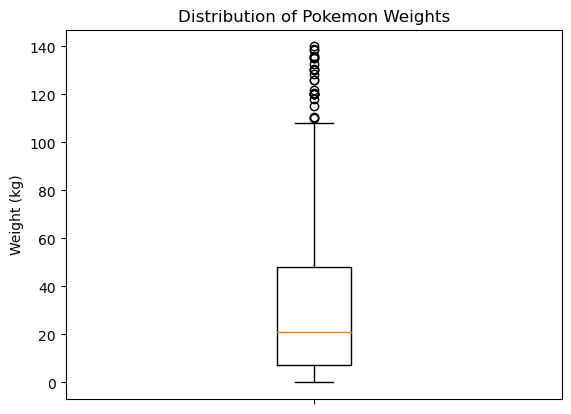

In [49]:
plt.boxplot(query['weight_kg'])
plt.ylabel('Weight (kg)')
plt.xticks([1], [""])
plt.title("Distribution of Pokemon Weights")

<Axes: xlabel='type1'>

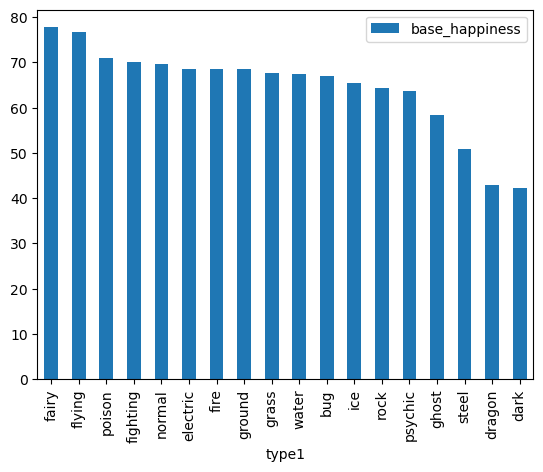

In [40]:
df = df.groupby('type1')[['base_happiness']].mean().sort_values('base_happiness', ascending=False)
df.plot(kind='bar')